# **Ejercicio**
Se ha proporcionado un conjunto de datos que tiene una variable llamada `clase` la cual contiene 3 clases diferentes ¿Puedes usar un algoritmo de clasificación para predecir la clase dadas otras categorías como `duracion`, `paginas`, `acciones`, `valor` tomadas como features?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('usuarios_win_mac_lin.csv')

In [3]:
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
# Recuento de cada variable agrupado por clase
df.groupby(['clase']).count()

,duracion,paginas,acciones,valor
clase,,,,
0,86,86,86,86
1,40,40,40,40
2,44,44,44,44


In [5]:
# Recuento de cada categoría en la variable clase
df.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

<ipython-input-6-9e442b1bcfe3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['clase'],1).hist()


<Figure size 15000x15000 with 0 Axes>

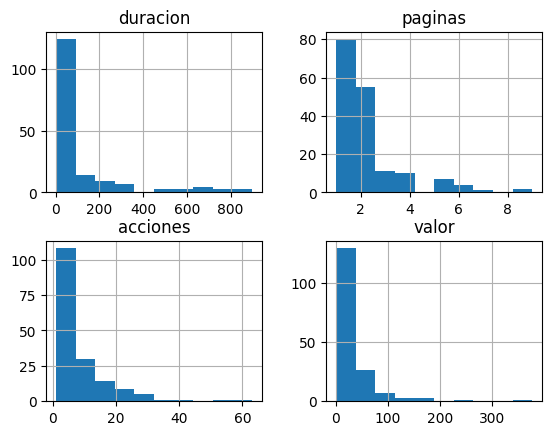

In [6]:
plt.figure(figsize=(150,150))
df.drop(['clase'],1).hist()
plt.show()

In [7]:
X = df.drop('clase', axis=1)

In [8]:
Y = df['clase']

In [9]:
X = X.values
Y = Y.values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=1)

In [11]:
modelo=linear_model.LogisticRegression()

In [12]:
standard_x = StandardScaler()
x_train=standard_x.fit_transform(x_train)
x_test=standard_x.fit_transform(x_test)

In [13]:
modelo.fit(x_train,y_train)

LogisticRegression()

In [14]:
prediccion = modelo.predict(x_test)

In [15]:
y_test

array([1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0])

In [16]:
prediccion

array([0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0])

In [17]:
testeando = pd.DataFrame({'test':y_test, 'predicciones':prediccion})

In [18]:
testeando.head()

,test,predicciones
0,1,0
1,0,0
2,1,0
3,2,2
4,0,2


En la muestra vemos 5 y acertó a 1, veamos qué dicen las métricas

In [19]:
metrics.confusion_matrix(y_test,prediccion)

array([[10,  0,  3],
       [ 8,  2,  0],
       [ 1,  0, 10]])

In [20]:
metrics.accuracy_score(y_test,prediccion)

0.6470588235294118

In [21]:
print(metrics.classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.53      0.77      0.62        13
           1       1.00      0.20      0.33        10
           2       0.77      0.91      0.83        11

    accuracy                           0.65        34
   macro avg       0.77      0.63      0.60        34
weighted avg       0.74      0.65      0.61        34



La métrica de accuracy es baja, vemos que no detecta bien la clase 1, el f1-score es de 0.33 apenas